#  运动恢复结构(SFM)


## 一、SFM与MVS的关系
运动恢复结构(structure from motion, SFM)算法的目的是输入一个图像集合，输出每张图像对应相机位姿的估计。SFM常作为多视图立体视觉(multi-view stereo,MVS)中的一个模块(除SFM外，还可以用VSLAM算法)。

MVS输入图像集合，输出重建带纹理的三维网格。MVS的重建效果与SFM中相机位姿估计的好坏有非常大的关系。

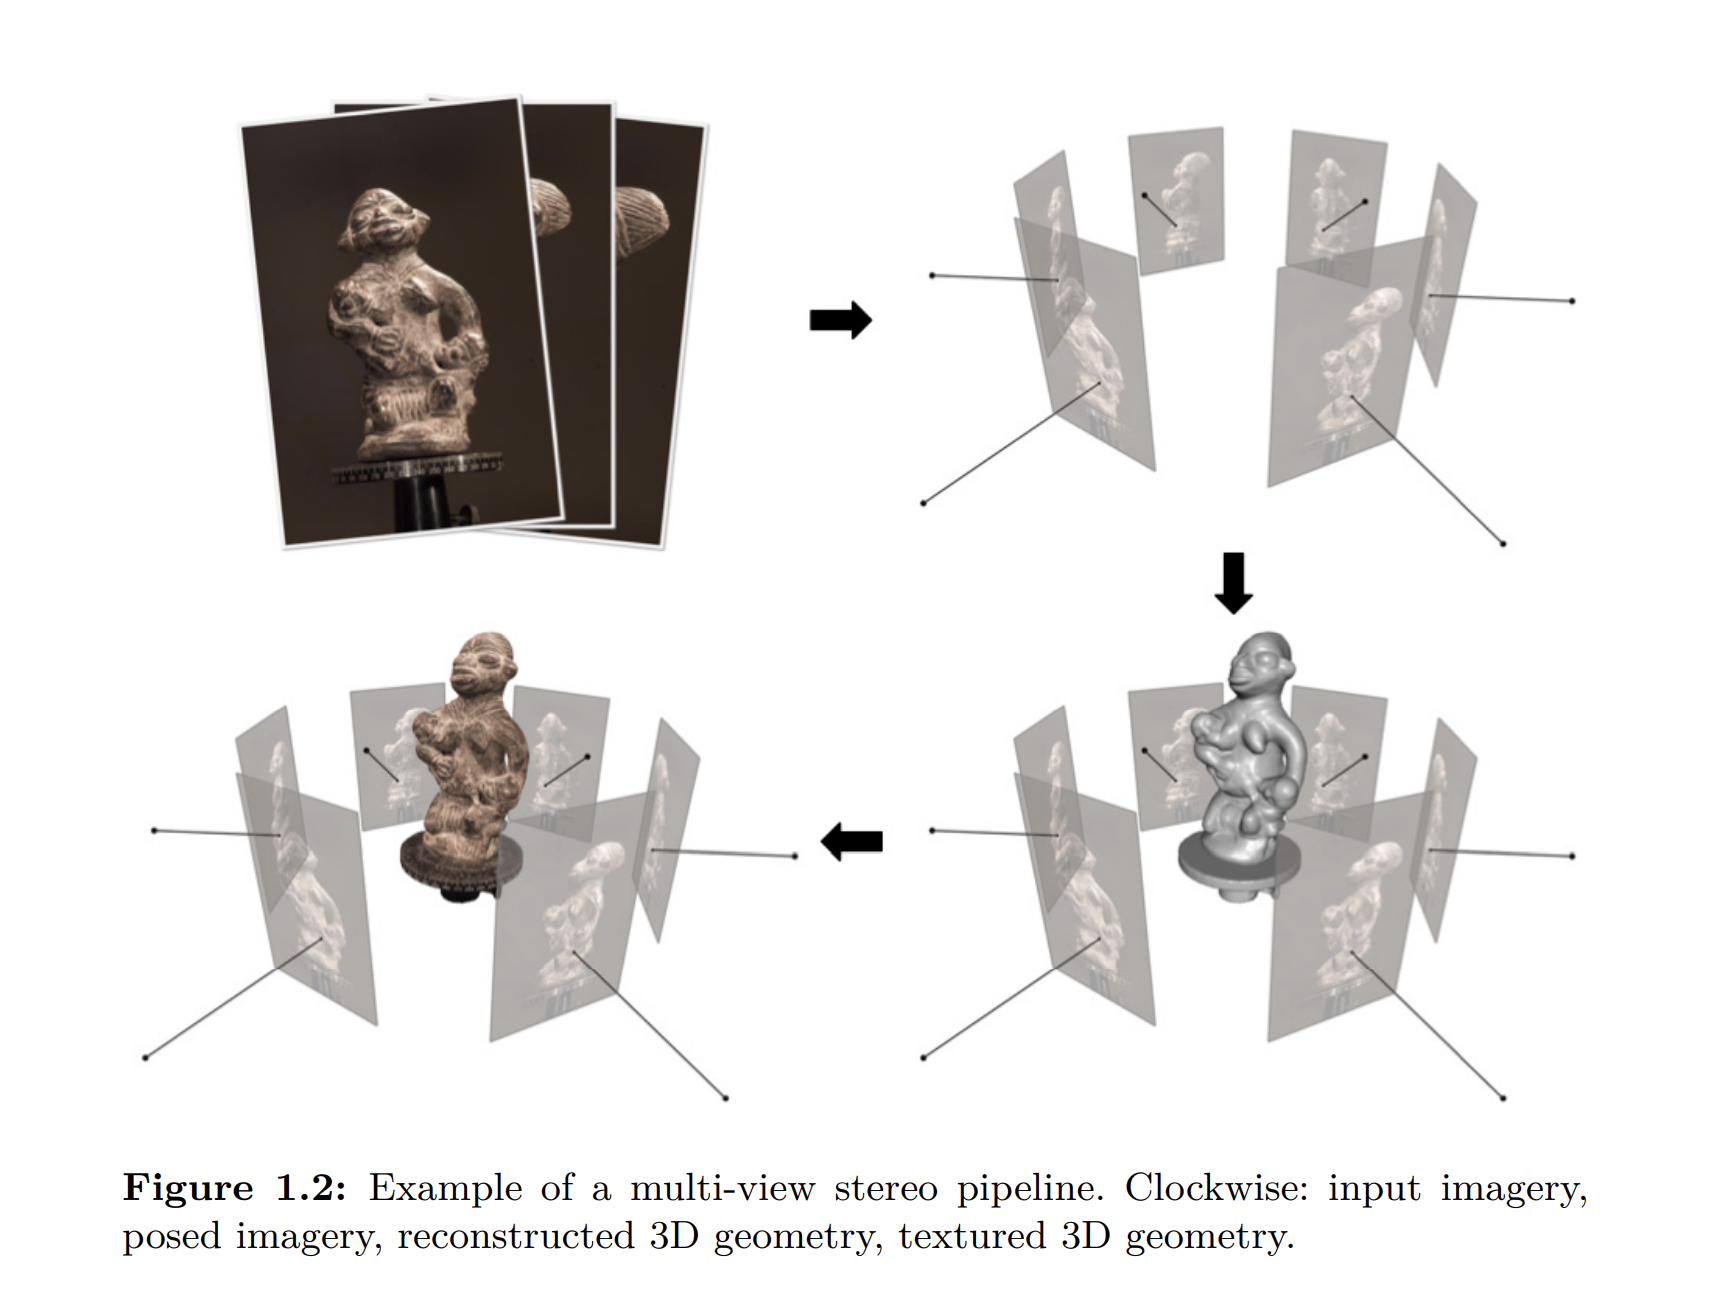

In [5]:
from PIL import Image
# MVS general framework
display(Image.open("../../resources/SFM/MVS_framework.png"))

## 二、SFM算法的框架

SFM算法输入图像集合，输出
1. 每张图的相机位姿估计$\{\hat{P}_i\}$,$P$是相机内参矩阵与外参矩阵的乘积，即投影矩阵。

2. 三维点和它对应图像子集的2D坐标$\{(M^j,\{m_i^j\})\}$,其中$M^j$代表第$j$个三位点，$\{m_i^j\}$代表该三位点在所有可见图像中的图像坐标。$(M^j,\{m_i^j\})$又被称为track。

SFM算法流程图为

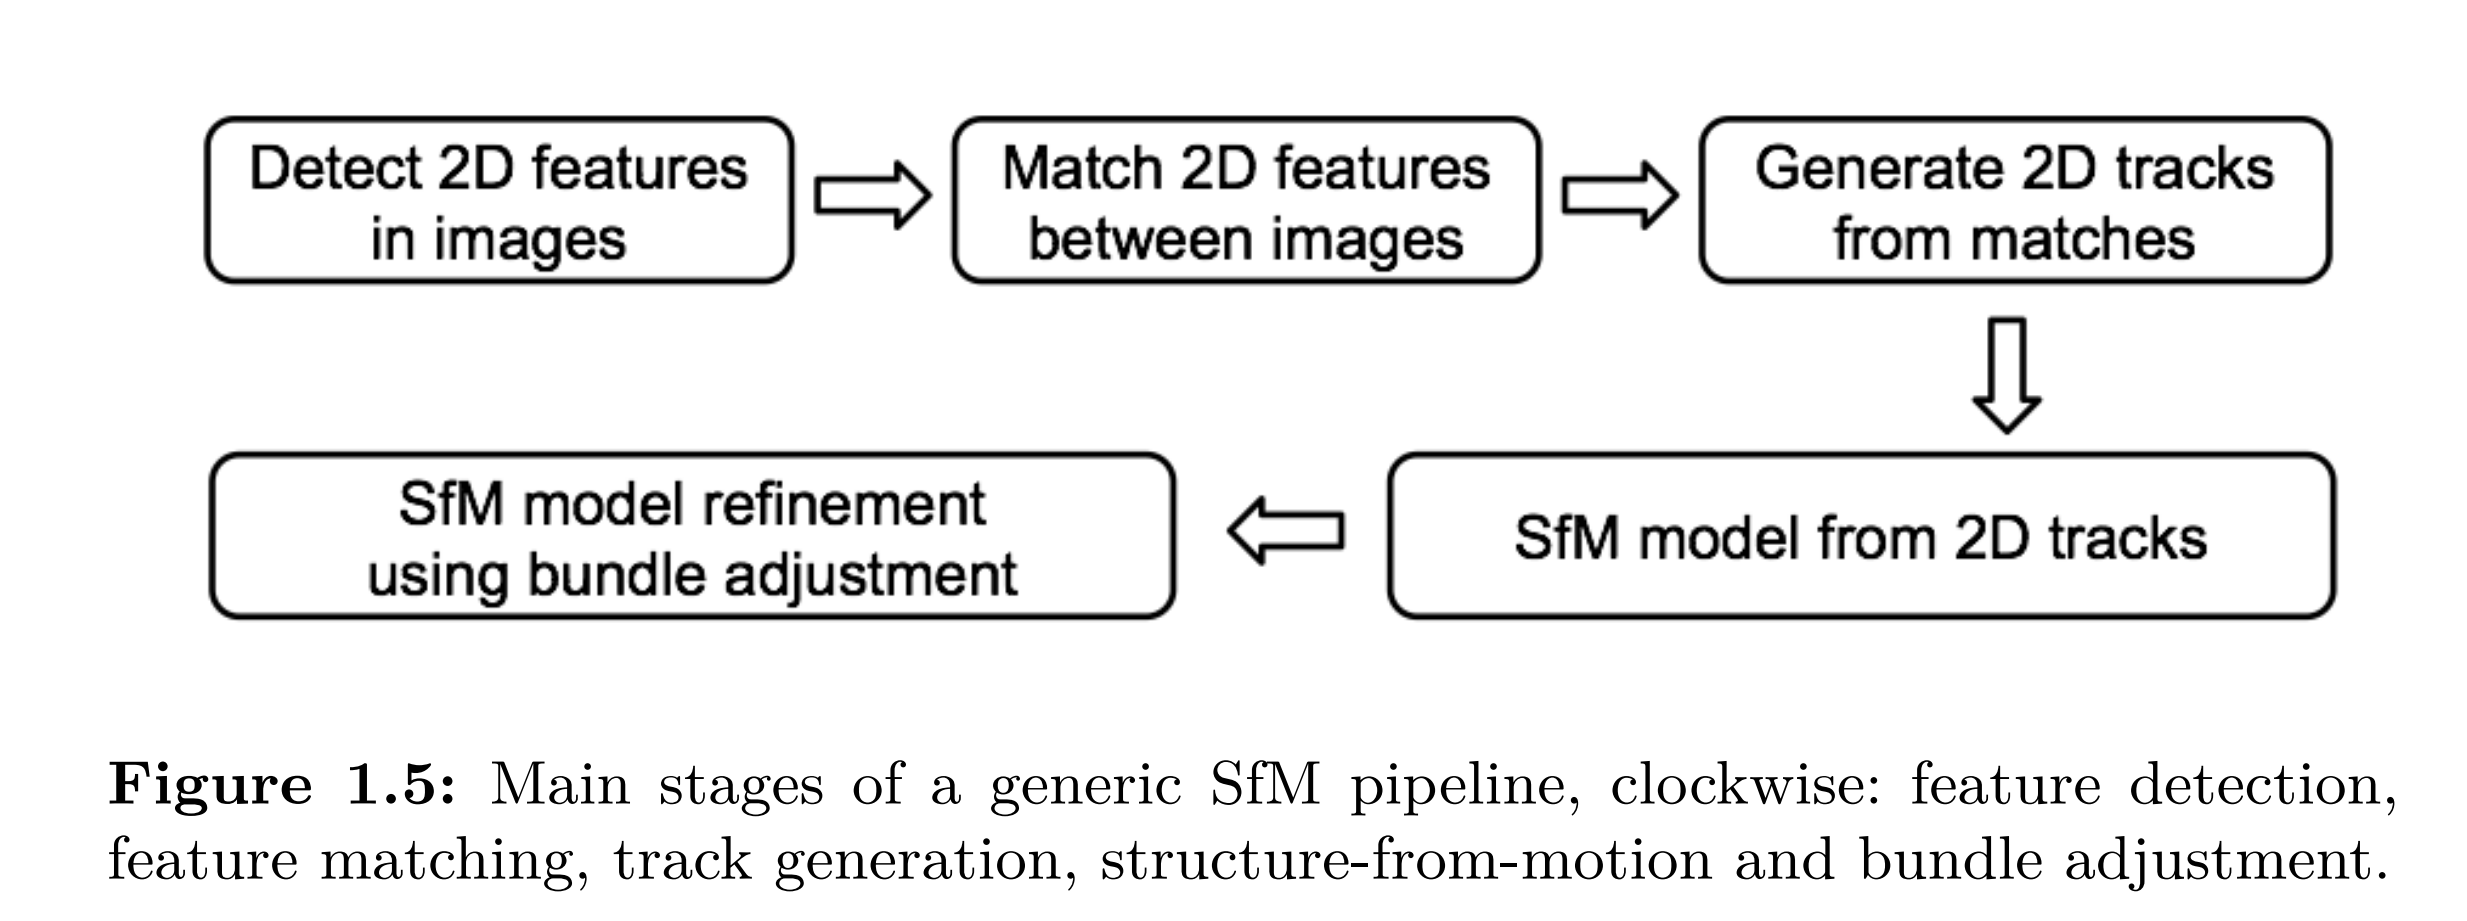

In [6]:
from PIL import Image
# SFM framework
display(Image.open("../../resources/SFM/SFM_framework.png"))

SFM算法流程具体包括：
1. feature detection 从图像中提取特征，比如SIFT特征、ORB特征等等
2. feature matching 用随机一致性采样(Random Sample Consensus, RANSAC)进行图像匹配，根据对极约束用Ransac求基础矩阵F,根据已知相机内参K求得本质矩阵E，再分解得到外参R,t，进而得到投影矩阵P = K[R |t]。
3. track generation 根据图像匹配结果，找到特征点之间的对应关系(2D tracks)
4. structure from motion 根据2D tracks和对应投影矩阵生成点云(三角化)
5. bundle adjustment 集束调整(优化R,t, 3D点坐标)

## 三、集束调整(Bundle adjustment)
集束调整(Bundle adjustment)有的学者会将其划入SFM，有的会认为它是SFM的后处理步骤，集束调整是对SFM输出结果的优化。它的输入是$\{\hat{P}_i\}$和$\{(M^j,\{m_i^j\})\}$，输出优化后的$\{\hat{P}_i\}$和$\{M^j\}$。

集束调整需要求解如下非线性最小二乘问题

$$\min_{P,M} E(P,M)=\sum_j \sum_{i\in V(j)}|P_i(M^j)-m_i^j|$$

其中$V(j)$是三维点$M^j$的可被观测相机的指标集，通过优化上式得到优化后的投影矩阵和三维点。

## 四、技术细节
### 4.1 随机一致性采样(RANSAC)
随机一致性采样(Ransac)是图像特征点匹配中常用到的一种技术，它的基本假设是样本中既包含正确数据(inliers)，即可以被模型假设的数据。也包含异常数据(outliers)，即偏离模型很远的数据。算法具体流程为

1. 考虑一个模型($n$为求解模型参数所需的最小样本数)和样本集$P$，满足$|P|>n$，首先从$P$中随机抽取包含$n$个样本的$P$的子集$S$初始化模型$M$；
2. 余集$S_C=P - S$中与模型$M$的误差小于某一阈值$\epsilon$的样本集与$S$的并集记做$S^*$，$S^*$是内点集或称为$S$关于模型的**一致集**(Consensus Set)；
3. 若$|S*|\geq N$ 则认为得到正确的模型参数，利用内点集$S*$用最小二乘等方法重新计算新的模型$M*$；重新随机抽取新的$S$，重复以上过程。
4. 在完成一定的抽样次数后，若未找到一致集则算法失败，否则选取抽样后得到的**最大一致集**对应的模型。

与用所有点进行估计的最小二乘法相比，RANSAC对离群点有非常高的稳健性。这是因为RANSAC在求解模型时并没有考虑全部点，而是只用一致集进行估计。

## 五、参考资料
[1] [github-SFM 代码](https://github.com/Ashok93/Structure-From-Motion-SFM-)

[2] [visual SFM软件使用方法](https://blog.csdn.net/xujie126/article/details/83108669)